In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import umap
from sklearn.model_selection import train_test_split

In [35]:
# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Plotting config
sns.set_style("white")
plt.rcParams['figure.dpi'] = 100

In [36]:
gex = pd.read_csv('/Users/dana/Desktop/AHI/01_PAML/Project/data/mammacarcinoma_gex.csv', index_col=0)
patinfo = pd.read_csv('/Users/dana/Desktop/AHI/01_PAML/Project/data/mammacarcinoma_pat.csv', index_col=0)

In [37]:
# merge metadata + gene expression by patient_id
data = patinfo.merge(gex, on="patient_id")

# define target
target_col = "er"
y = data[target_col]
X = data.drop(columns=[target_col])

In [38]:
print(X.shape)
print(y.shape)

(327, 6389)
(327,)


In [39]:
# Remove samples with missing target 
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

In [40]:
print(f"Removed {len(mask) - mask.sum()} samples with missing labels.")

Removed 19 samples with missing labels.


In [41]:
print(X.shape)
print(y.shape)

(308, 6389)
(308,)


In [42]:
X

,node,grade,size,age,relapse,DDR1,RFC2,HSPA6,PAX8,GUCA1A,...,CASP8AP2,POLM,KLK5,SH3BP4,SPO11,TRDN,DKFZP564C196,YDD19,TAZ,GMEB2
patient_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,0.0,44.0,0.0,9.2048,6.3038,7.7602,7.9725,4.26530,...,5.8878,2.5847,6.1013,8.4443,3.151000,1.83220,3.38240,3.7738,5.6098,7.2277
1,0.0,NaN,0.3,61.0,0.0,10.0090,5.8149,6.7343,7.9232,3.50110,...,6.7993,5.5474,6.3789,8.3950,3.133900,1.90000,3.25240,3.2802,6.2927,7.2210
2,0.0,NaN,1.5,53.0,0.0,8.6175,5.9355,5.8762,6.5176,2.53460,...,6.5924,4.5240,7.2288,8.0967,3.149900,-1.16120,2.68950,3.6827,5.5525,6.6015
3,0.0,3.0,3.0,62.0,1.0,9.6734,7.0122,5.5486,8.0859,4.28850,...,6.5698,4.6732,5.3107,9.1025,3.112300,-0.63409,2.66560,3.4840,6.4214,7.7900
4,NaN,3.0,NaN,NaN,0.0,9.0900,6.0937,6.6429,7.9868,3.27290,...,5.7934,5.0880,5.2918,7.3995,4.138500,-0.47459,-0.89478,2.7115,6.4785,7.1017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.0,2.0,2.5,69.0,NaN,9.6058,5.6191,6.8271,7.8933,5.17700,...,6.4481,4.9890,5.0753,8.7309,4.053800,2.65610,3.46090,2.0747,6.3080,7.1414
323,NaN,1.0,NaN,NaN,NaN,9.5777,6.1209,6.1702,6.9966,4.01260,...,5.6446,3.9242,6.2588,8.3053,2.981300,3.80950,3.76110,4.4177,5.6289,6.6664
324,0.0,2.0,2.1,40.0,0.0,8.7979,5.2583,5.8413,7.7988,4.92420,...,6.2356,3.9251,5.0435,8.9658,5.158400,1.15010,0.82005,2.5920,6.3487,7.3176


In [43]:
# identify gene expression columns (all genes except metadata)
meta_cols = ["node", "grade", "size", "age","relapse", "patient_id"]  # patient_id for merging drop later
gene_cols = [c for c in X.columns if c not in meta_cols]

In [44]:
# drop patient_id from features after merging
meta_cols_no_id = ["node", "grade", "size", "age","relapse"]

In [45]:
# split into train, temp, test (stratify on target)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [46]:
# extract gene expression and metadata subsets
X_train_gene = X_train[gene_cols]
X_val_gene = X_val[gene_cols]
X_test_gene = X_test[gene_cols]

X_train_meta = X_train[meta_cols_no_id]
X_val_meta = X_val[meta_cols_no_id]
X_test_meta = X_test[meta_cols_no_id]

In [47]:
# scale gene expression data
gene_scaler = StandardScaler()
X_train_gene_scaled = gene_scaler.fit_transform(X_train_gene)
X_val_gene_scaled = gene_scaler.transform(X_val_gene)
X_test_gene_scaled = gene_scaler.transform(X_test_gene)

In [48]:
X_train_gene_scaled

array([[-0.96037125,  1.68093133, -1.23596796, ...,  1.39991169,
        -0.35074026, -0.36011643],
       [ 0.92951383,  0.04183   , -0.01448924, ...,  0.53094871,
         1.23945018,  1.45172577],
       [ 0.26481044,  0.80527165,  0.05699797, ...,  1.90601244,
         0.51388331, -0.97610992],
       ...,
       [ 0.50211933, -0.20738379,  0.41720842, ..., -2.00425567,
         1.05867649,  0.79490071],
       [ 0.44058597, -1.49187616, -0.23496208, ...,  0.49399657,
         0.47340236,  1.17951531],
       [ 2.7311534 , -1.07747745,  0.80266597, ..., -0.76629354,
         0.53273321,  2.54197559]], shape=(184, 6384))

In [49]:
# fit full PCA for plotting
pca_full = PCA(random_state=42)
pca_full.fit(X_train_gene_scaled)

explained_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

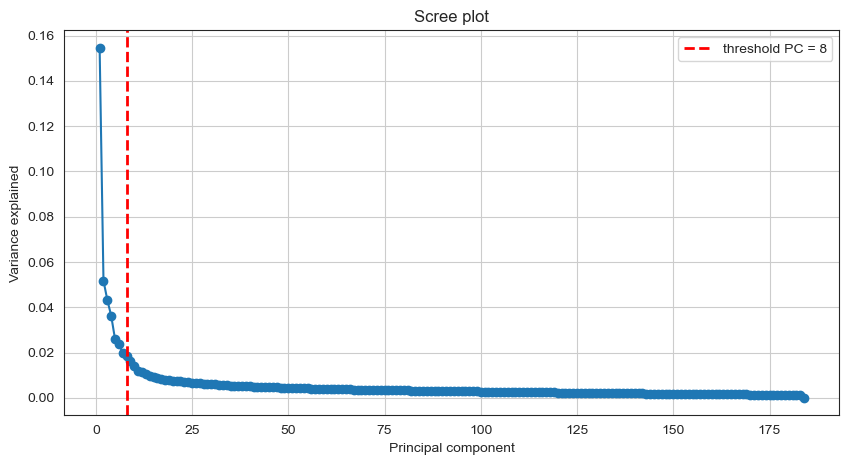

In [50]:
# create scree plot and save
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_var) + 1), explained_var, marker='o')
plt.axvline(x=8, color='r', linestyle='--', linewidth=2, label='threshold PC = 8')
plt.title("Scree plot")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.grid(True)
plt.legend()
plt.savefig("scree_plot.png", dpi=300)
plt.show()

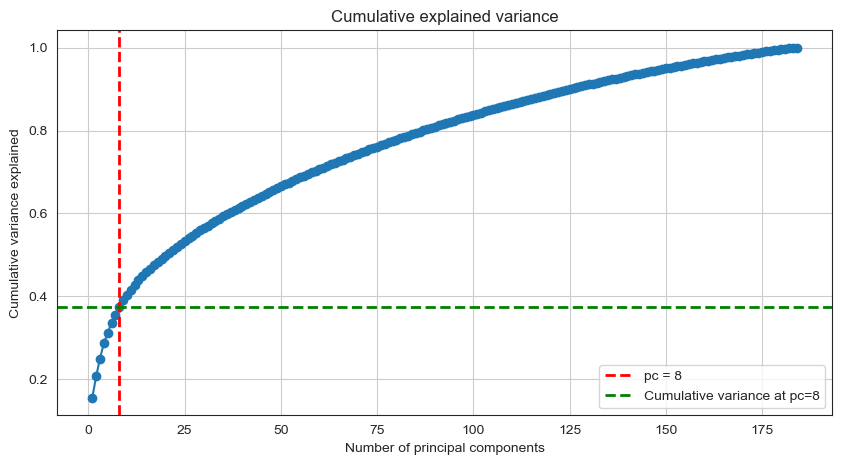

In [51]:
# create cumulative variance plot and save
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(cum_var) + 1), cum_var, marker='o')
plt.axvline(x=8, color='r', linestyle='--', linewidth=2, label='pc = 8')
plt.axhline(y=cum_var[7], color='g', linestyle='--', linewidth=2, label='Cumulative variance at pc=8')
plt.title("Cumulative explained variance")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative variance explained")
plt.grid(True)
plt.legend()
plt.savefig("cumulative_variance_plot.png", dpi=300)
plt.show()

In [52]:
cumvar = np.cumsum(pca_full.explained_variance_ratio_)
print(f"PC1-8 explain {cumvar[7]*100:.1f}% variance")

PC1-8 explain 37.4% variance


In [53]:
# select pc = 8 for final transformation
pca_final = PCA(n_components=8, random_state=42)
X_train_pca = pca_final.fit_transform(X_train_gene_scaled)
X_val_pca = pca_final.transform(X_val_gene_scaled)
X_test_pca = pca_final.transform(X_test_gene_scaled)

# scale metadata separately
meta_scaler = StandardScaler()
X_train_meta_scaled = meta_scaler.fit_transform(X_train_meta)
X_val_meta_scaled = meta_scaler.transform(X_val_meta)
X_test_meta_scaled = meta_scaler.transform(X_test_meta)

# concatenate pca components with scaled metadata
X_train_final = np.hstack([X_train_pca, X_train_meta_scaled])
X_val_final = np.hstack([X_val_pca, X_val_meta_scaled])
X_test_final = np.hstack([X_test_pca, X_test_meta_scaled])

print("train final shape:", X_train_final.shape)
print("validation final shape:", X_val_final.shape)
print("test final shape:", X_test_final.shape)

train final shape: (184, 13)
validation final shape: (62, 13)
test final shape: (62, 13)


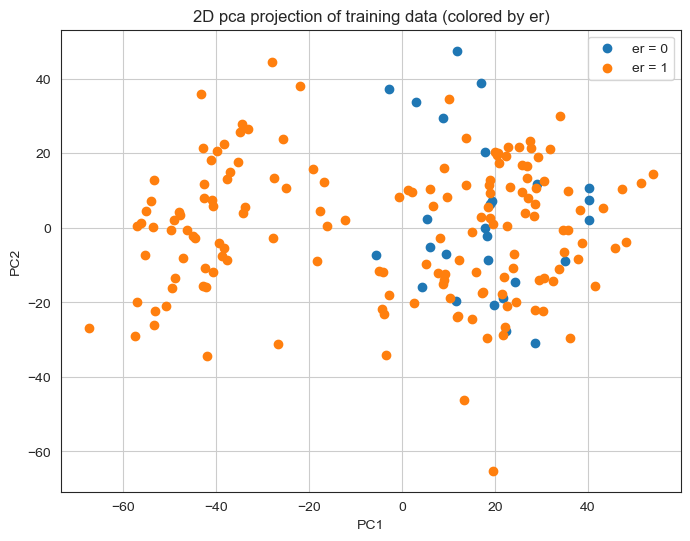

In [54]:
# project training data into pca space (first two components)
pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]

# convert y_train to numpy array for indexing
y_train_array = np.array(y_train)

# create 2d scatter plot
plt.figure(figsize=(8, 6))

# plot er = 0
plt.scatter(
    pc1[y_train_array == 0],
    pc2[y_train_array == 0],
    label='er = 0',
)

# plot er = 1
plt.scatter(
    pc1[y_train_array == 1],
    pc2[y_train_array == 1],
    label='er = 1',
)

# axis labels and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D pca projection of training data (colored by er)")
plt.legend()
plt.grid(True)
plt.show()

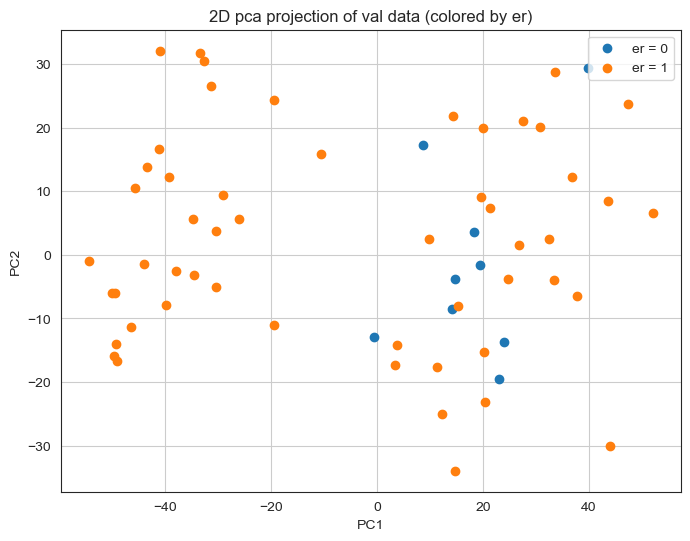

In [55]:
# project val data into pca space (first two components)
pc1 = X_val_pca[:, 0]
pc2 = X_val_pca[:, 1]

# convert y_val to numpy array for indexing
y_val_array = np.array(y_val)

# create 2d scatter plot
plt.figure(figsize=(8, 6))

# plot er = 0
plt.scatter(
    pc1[y_val_array == 0],
    pc2[y_val_array == 0],
    label='er = 0',
)

# plot er = 1
plt.scatter(
    pc1[y_val_array == 1],
    pc2[y_val_array == 1],
    label='er = 1',
)

# axis labels and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D pca projection of val data (colored by er)")
plt.legend()
plt.grid(True)
plt.show()

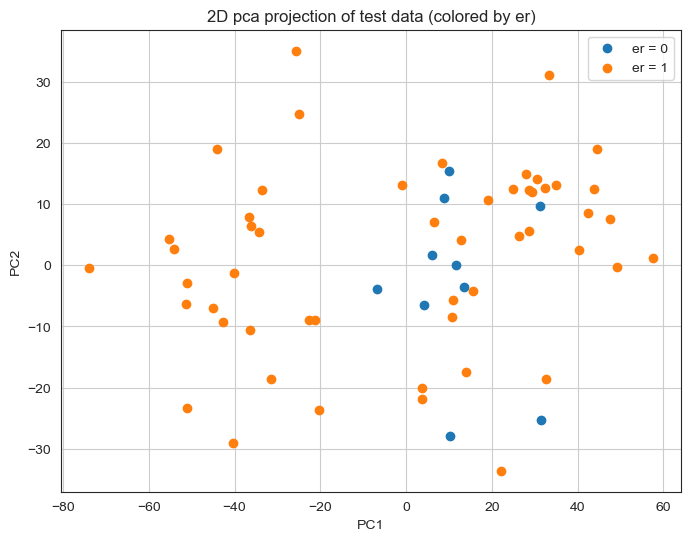

In [56]:
# project val data into pca space (first two components)
pc1 = X_test_pca[:, 0]
pc2 = X_test_pca[:, 1]

# convert y_test to numpy array for indexing
y_test_array = np.array(y_test)

# create 2d scatter plot
plt.figure(figsize=(8, 6))

# plot er = 0
plt.scatter(
    pc1[y_test_array == 0],
    pc2[y_test_array == 0],
    label='er = 0',
)

# plot er = 1
plt.scatter(
    pc1[y_test_array == 1],
    pc2[y_test_array == 1],
    label='er = 1',
)

# axis labels and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D pca projection of test data (colored by er)")
plt.legend()
plt.grid(True)
plt.show()

# UMAP

/Users/dana/miniconda3/envs/ML/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


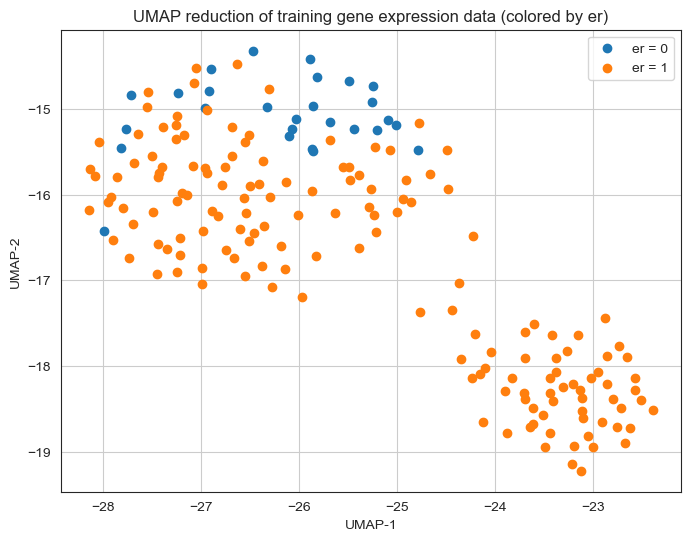

In [99]:
# fit umap on scaled gene expression training data
umap_model = umap.UMAP(n_neighbors=20, #small - local structure, large - global
                        n_components=2,# dimensionality 2D
                        random_state=42)

X_train_umap = umap_model.fit_transform(X_train_gene_scaled)

# extract umap coordinates
u1 = X_train_umap[:, 0]
u2 = X_train_umap[:, 1]

# convert y_train to numpy array
y_train_array = np.array(y_train)

# plot umap embedding
plt.figure(figsize=(8, 6))

# er = 0
plt.scatter(
    u1[y_train_array == 0],
    u2[y_train_array == 0],
    label='er = 0')

# er = 1
plt.scatter(
    u1[y_train_array == 1],
    u2[y_train_array == 1],
    label='er = 1')

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP reduction of training gene expression data (colored by er)")
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# In case I choose UMAP as dim red method
# X_val_umap = umap_model.transform(X_val_gene_scaled)
# X_test_umap = umap_model.transform(X_test_gene_scaled)

# tSNE

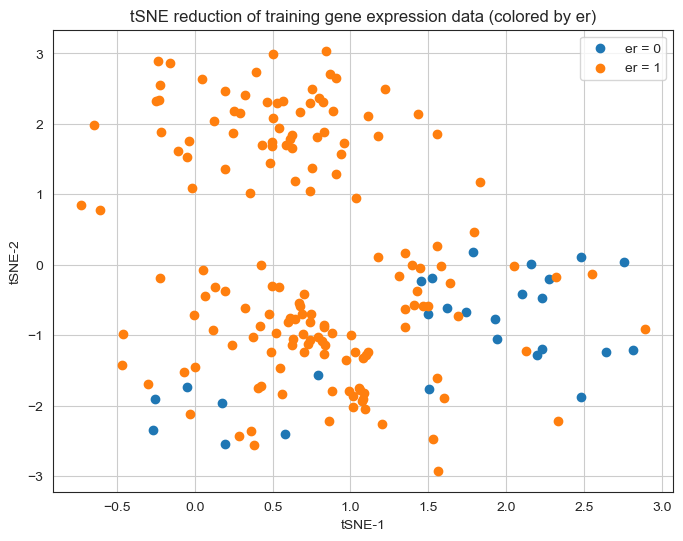

In [ ]:
# fit tsne on scaled gene expression training data
tsne_model = TSNE(n_components=2,perplexity=100,learning_rate='auto',init='pca',random_state=42)

X_train_tsne = tsne_model.fit_transform(X_train_gene_scaled)

# extract tsne coordinates
t1 = X_train_tsne[:, 0]
t2 = X_train_tsne[:, 1]

# convert y_train to numpy array
y_train_array = np.array(y_train)

# plot tsne embedding
plt.figure(figsize=(8, 6))

# er = 0
plt.scatter(
    t1[y_train_array == 0],
    t2[y_train_array == 0],
    label='er = 0')

# er = 1
plt.scatter(
    t1[y_train_array == 1],
    t2[y_train_array == 1],
    label='er = 1')

plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.title("tSNE reduction of training gene expression data (colored by er)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation of the dim. red. methods based on silhouette score

In [100]:
# Prepare data for plotting
y_train_array = np.array(y_train)
embeddings = {
    'PCA': X_train_pca[:, :8],
    'UMAP': X_train_umap,
    't-SNE': X_train_tsne
}

In [101]:
results = []

for method_name, coords in embeddings.items():
    # for PCA, coords are first 8 PCs
    # for UMAP and t-SNE, coords are already 2D
    eval_coords = coords
    
    score = silhouette_score(eval_coords, y_train_array, metric='euclidean')
    results.append({'Method': method_name, 'Silhouette Score': score})
    print(f"{method_name:8s}: {score:.3f}")

PCA     : 0.079
UMAP    : 0.029
t-SNE   : 0.055


/var/folders/vw/l75dqd9j0qj20rfkms8tr5gr0000gn/T/ipykernel_8207/535243730.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


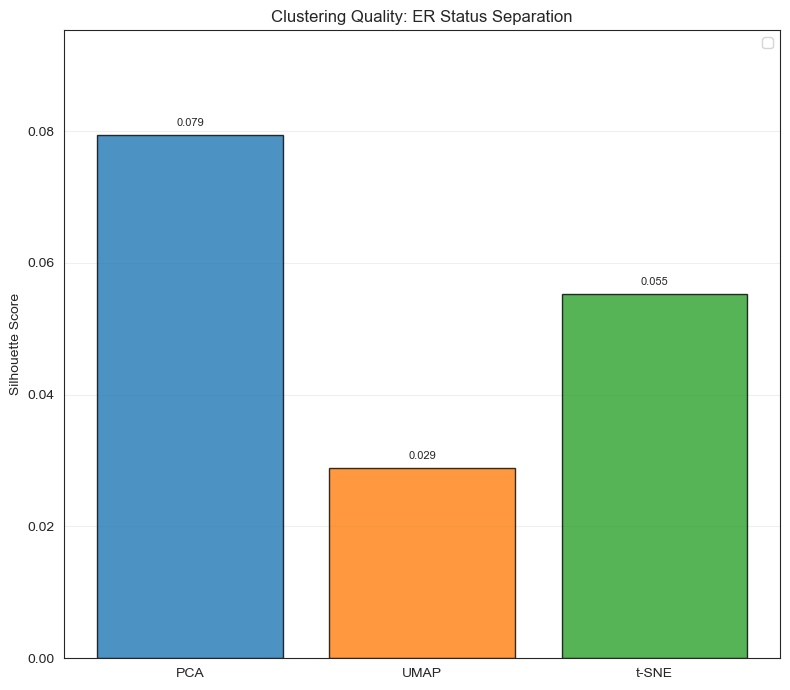


 Optimal method for ER separation: PCA


In [102]:
# Visualize scores
results_df = pd.DataFrame(results)
plt.figure(figsize=(8, 7))
bars = plt.bar(results_df['Method'], results_df['Silhouette Score'], 
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
              edgecolor='black', alpha=0.8)
plt.ylabel('Silhouette Score')
plt.title('Clustering Quality: ER Status Separation')
plt.ylim(0, max(results_df['Silhouette Score']) * 1.2)
#plt.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='Good threshold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, score in zip(bars, results_df['Silhouette Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
            f'{score:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('part1_silhouette_scores.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Optimal method for ER separation: {results_df.loc[results_df['Silhouette Score'].idxmax(), 'Method']}")

# Saveing the data

In [69]:
# create column names for pca components
pca_cols = [f"pc{i+1}" for i in range(8)]
meta_cols = ["node", "grade", "size", "age","relaps"]

# combine pca + metadata for train
X_train_final = np.hstack([X_train_pca, X_train_meta_scaled])
df_train = pd.DataFrame(X_train_final, columns=pca_cols + meta_cols)
df_train["er"] = y_train.values   # include target
df_train.to_csv("train_pca_data.csv", index=False)

# combine pca + metadata for validation
X_val_final = np.hstack([X_val_pca, X_val_meta_scaled])
df_val = pd.DataFrame(X_val_final, columns=pca_cols + meta_cols)
df_val["er"] = y_val.values       
df_val.to_csv("val_pca_data.csv", index=False)

# combine pca + metadata for test
X_test_final = np.hstack([X_test_pca, X_test_meta_scaled])
df_test = pd.DataFrame(X_test_final, columns=pca_cols + meta_cols)
df_test["er"] = y_test.values  
df_test.to_csv("test_pca_data.csv", index=False)